In [101]:
library(ggplot2)
options(repr.plot.height=4, repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [102]:
airbnb <- read.csv('data//airbnb.csv', sep = ',', stringsAsFactors = TRUE)
str(airbnb)

'data.frame':	13207 obs. of  13 variables:
 $ Zipcode               : Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...
 $ Neighbourhood.Cleansed: Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ Property.Type         : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ Room.Type             : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ Accommodates          : int  2 6 3 3 5 2 7 3 2 4 ...
 $ Bathrooms             : num  2 1 1 2 1 1 5 1 1 2 ...
 $ Bedrooms              : int  1 3 2 1 1 0 1 1 1 2 ...
 $ Beds                  : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ Bed.Type              : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Amenities             : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ Square.Feet           : int  NA NA NA NA 538 NA NA NA 

Mostrar las primeras 6 filas del dataframe

In [103]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [104]:
newnames <- c("CodigoPostal", "Barrio", "TipoPropiedad", "TipoAlquiler", "MaxOcupantes", "NumBanyos",
            "NumDormitorios", "NumCamas", "TipoCama", "Comodidades", "PiesCuadrados", "Precio", "Puntuacion")
colnames(airbnb) <- newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [105]:
airbnb $MetrosCuadrados <- round(airbnb $PiesCuadrados * 0.092903, 0)

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no empiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dentro de 28002

El código 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 junto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [106]:
airbnb $CodigoPostal[airbnb $CodigoPostal=='' | airbnb $CodigoPostal == '-' | airbnb $CodigoPostal == '28'] <- NA

airbnb $CodigoPostal[!grepl("^28", airbnb $CodigoPostal)] <- NA

airbnb $CodigoPostal[airbnb $CodigoPostal == '28002\n28002'] <- '28002'
airbnb $CodigoPostal[airbnb $CodigoPostal == '28051\n28051'] <- '28051'
airbnb $CodigoPostal[airbnb $CodigoPostal == 'Madrid 28004'] <- '28004'

airbnb $CodigoPostal[airbnb $CodigoPostal == '2804'] <- '28004'
airbnb $CodigoPostal[airbnb $CodigoPostal == '2805'] <- '28005'
airbnb $CodigoPostal[airbnb $CodigoPostal == '2815'] <- '28015'
airbnb $CodigoPostal[airbnb $CodigoPostal == '2015'] <- '28015'

airbnb $CodigoPostal <- factor(airbnb $CodigoPostal)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [107]:
paste("Hay", length(unique(airbnb $CodigoPostal)), "códigos postales diferentes.")
unique(airbnb $CodigoPostal)

[1] "Hay 63 códigos postales diferentes."

[1] 28004  28015  28013  28005  28012  28014  28045  <NA>   28007  28028 
[11] 28009  28001  28006  28010  28002  28034  28050  28008  28011  28049 
[21] 28038  28053  28047  28025  28019  28024  28016  28036  28046  28039 
[31] 28020  28003  28029  28054  28041  28026  28058  28018  28030  28017 
[41] 28027  28043  28033  28055  28021  28032  28037  28022  28042  28094 
[51] 280013 28035  28040  28031  28044  28105  28023  28051  28850  28048 
[61] 28056  28060  28052 
62 Levels: 28001 280013 28002 28003 28004 28005 28006 28007 28008 ... 28850

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [108]:
print("Los 5 códigos postales con más entradas son:")
head(sort(table(airbnb $CodigoPostal), decreasing = TRUE), 5)

print("Los 5 códigos postales con menos entradas son:")
head(sort(table(airbnb $CodigoPostal), decreasing = FALSE), 5)

[1] "Los 5 códigos postales con más entradas son:"



28012 28004 28005 28013 28014 
 2060  1795  1195  1019   630 

[1] "Los 5 códigos postales con menos entradas son:"



280013  28048  28052  28056  28058 
     1      1      1      1      1 

¿Cuales son los barrios que hay en el código postal 28012?

In [109]:
unique(airbnb[which(airbnb $CodigoPostal == '28012'),] $Barrio)

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuántas entradas hay en cada uno de esos barrios para el código postal 28012?

In [110]:
airbnb28012 <- airbnb[which(airbnb $CodigoPostal == '28012'),]
airbnb28012 $Barrio <- factor(airbnb28012 $Barrio)
table(airbnb28012 $Barrio)


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [111]:
paste("Hay un total de", length(unique(airbnb $Barrio)), "barrios en el dataset de airbnb. Estos son:")
levels(airbnb $Barrio)

[1] "Hay un total de 125 barrios en el dataset de airbnb. Estos son:"

[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [112]:
head(sort(table(airbnb $Barrio),decreasing = TRUE), 5)


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [113]:
paste("Hay", length(unique(airbnb $TipoAlquiler)), "tipos de alquileres diferentes. Estos son:")
table(airbnb $TipoAlquiler)

[1] "Hay 3 tipos de alquileres diferentes. Estos son:"


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


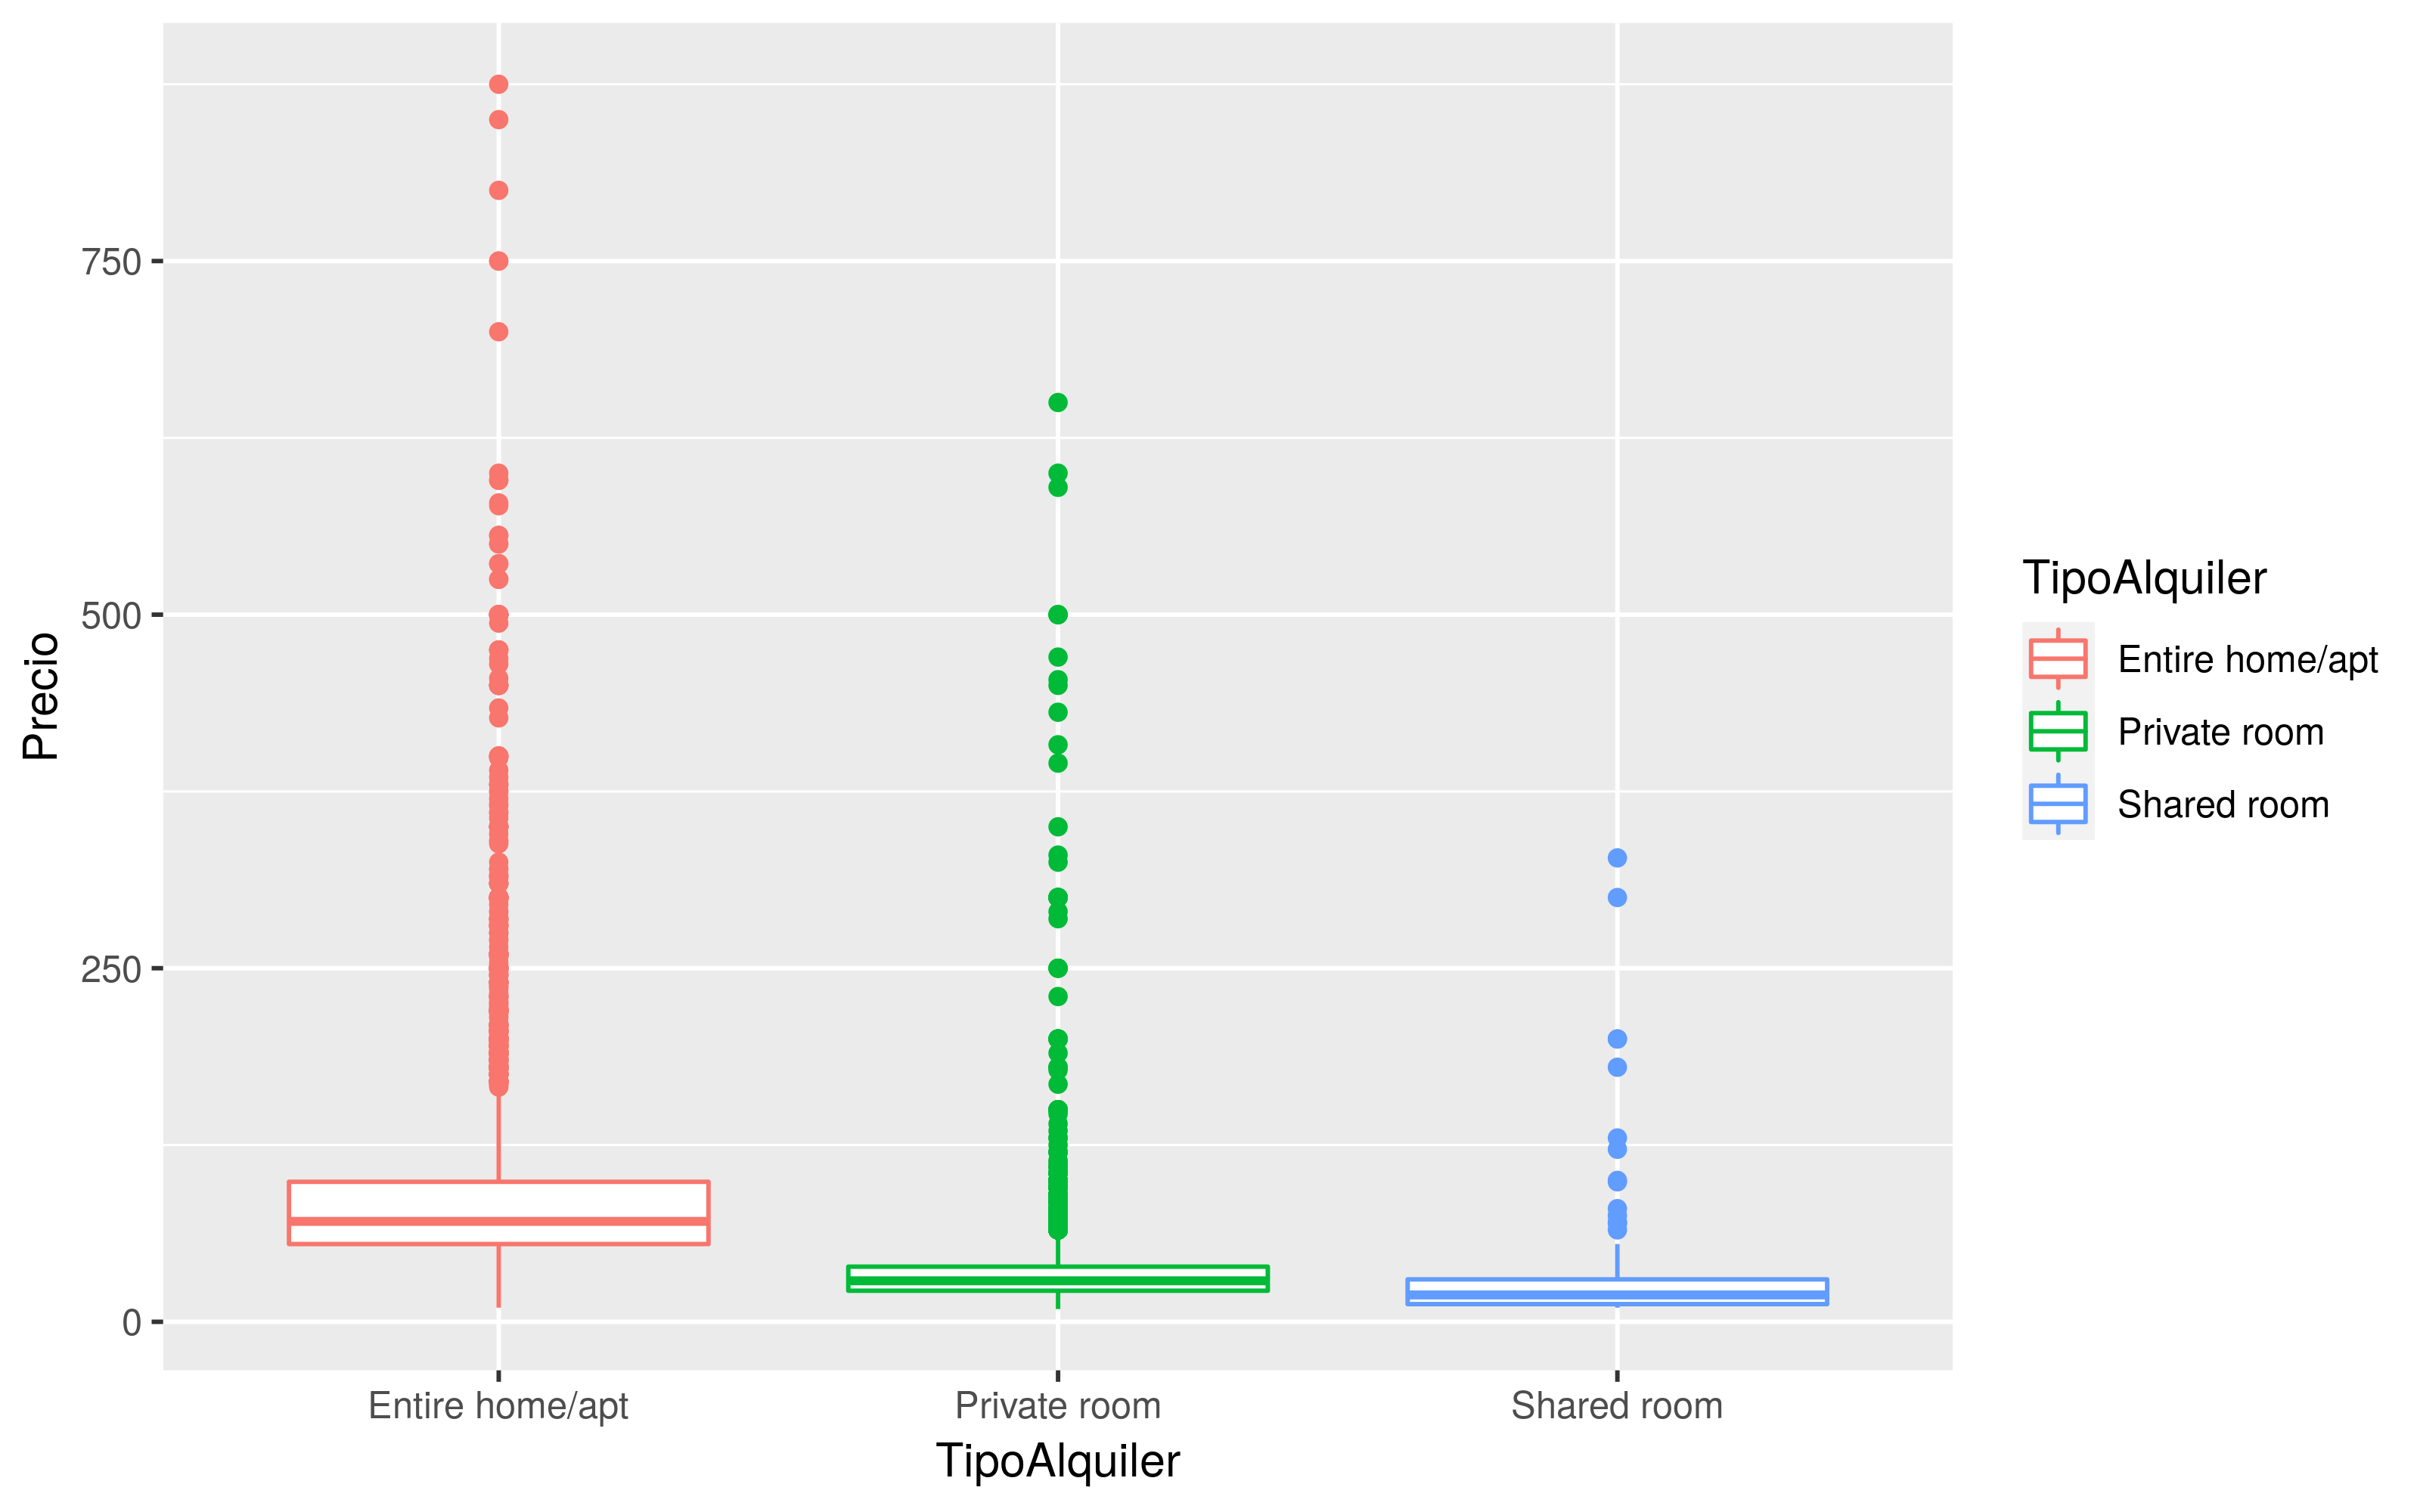

In [114]:
library(ggplot2)
options(repr.plot.height=5, repr.plot.width=8 , repr.plot.res = 400)
ggplot(airbnb, aes(y=Precio, x=TipoAlquiler, color=TipoAlquiler)) + geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [115]:
for (i in levels(airbnb $TipoAlquiler))
{
    subset_tipo <- subset(airbnb, TipoAlquiler == i)
    print(paste("Precio medio tipo", i, "=", mean(subset_tipo $Precio, na.rm=T)))

    if (nrow(subset_tipo) > 5000)
    {
        subset_tipo <- subset_tipo[1:5000,]
    }
    
    spt <- shapiro.test(subset_tipo $Precio)
    print(paste("Test shapiro pvalor =", spt $p.value))
}

krt <- kruskal.test(Precio~TipoAlquiler, airbnb)

paste("Las medias son estadísticamente diferentes ya que el pvalor es muy bajo; pvalor =", krt $p.value)

[1] "Precio medio tipo Entire home/apt = 87.2966058763931"
[1] "Test shapiro pvalor = 1.24077898621874e-72"
[1] "Precio medio tipo Private room = 34.255135981217"
[1] "Test shapiro pvalor = 9.18974842339072e-85"
[1] "Precio medio tipo Shared room = 29.8534031413613"
[1] "Test shapiro pvalor = 4.51672121600842e-24"


[1] "Las medias son estadísticamente diferentes ya que el pvalor es muy bajo; pvalor = 0"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [116]:
airbnb_entire <- subset(airbnb, TipoAlquiler == 'Entire home/apt')

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [117]:
head(sort(table(airbnb_entire $Barrio) ,decreasing = TRUE), 5)


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [118]:
media_precio <- aggregate(Precio ~ Barrio, airbnb_entire, mean,na.rm = TRUE)
media_precio <- media_precio[order(media_precio $Precio, decreasing = TRUE),]
head(media_precio, 5)

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [119]:
cuenta <- data.frame(table(airbnb_entire $Barrio))
colnames(cuenta) <- c("Barrio", "Freq")
media_precio <- merge(cuenta, media_precio, by="Barrio")

media_precio <- media_precio[order(media_precio $Precio, decreasing = TRUE),]
head(media_precio, 5)

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
77,Palomas,4,309.7500
50,Fuentelareina,2,180.0000
93,Recoletos,135,161.9254
43,El Plantío,1,150.0000
30,Castellana,73,141.3889


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [120]:
media_precio100 <- subset(media_precio, media_precio $Freq > 100)
head(media_precio100, 5)

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
93,Recoletos,135,161.92537
52,Goya,142,111.33803
106,Sol,701,100.75036
108,Trafalgar,223,98.57848
59,Justicia,534,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


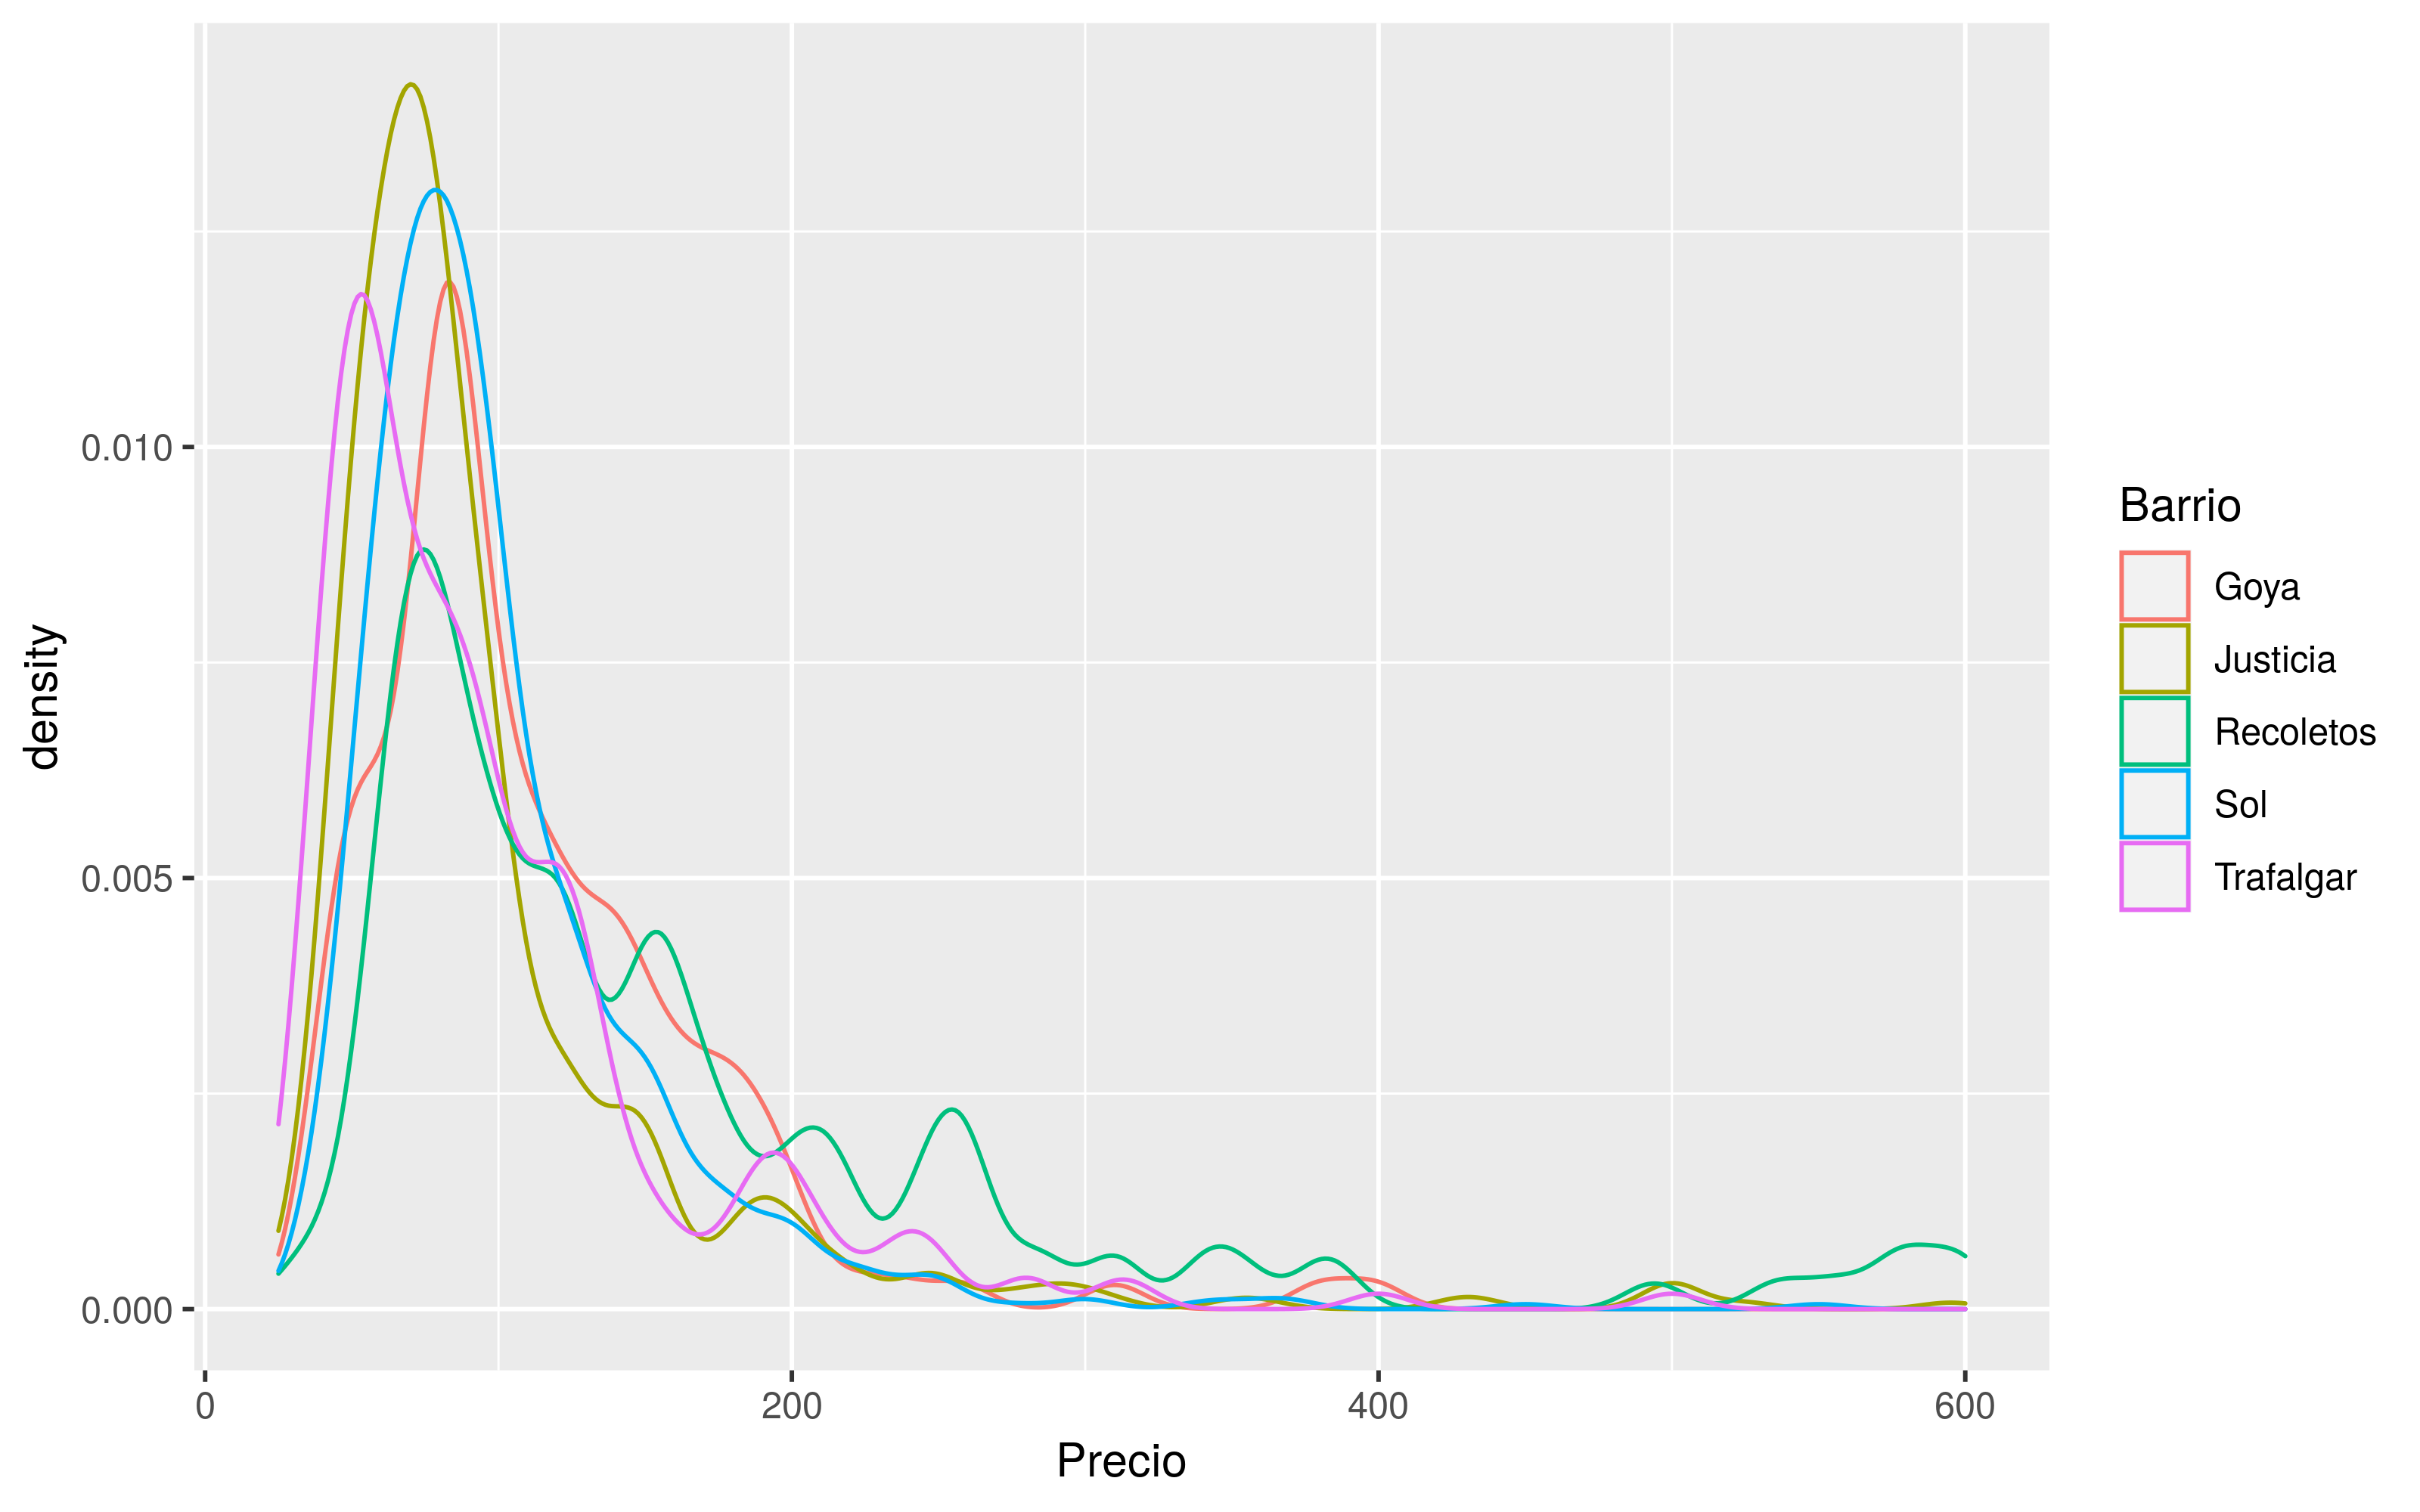

In [121]:
topprecio_barrios <- head(media_precio100, 5) $Barrio
top_barrios <- subset(airbnb_entire, Barrio %in% topprecio_barrios)
ggplot(top_barrios, aes(x=Precio, color=Barrio)) + geom_density(bw=10)

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [122]:
media_dim <- aggregate(. ~ Barrio, airbnb_entire[c("Barrio", "MetrosCuadrados")], mean, na.rm = TRUE)
media_precio_dim_100 <- merge(media_precio100, media_dim, by="Barrio")

media_precio_dim_100 <- media_precio_dim_100[order(media_precio_dim_100 $Precio, decreasing = TRUE),]
head(media_precio_dim_100, 5)

,Barrio,Freq,Precio,MetrosCuadrados
,<fct>,<int>,<dbl>,<dbl>
8,Recoletos,135,161.92537,26.66667
4,Goya,142,111.33803,51.66667
9,Sol,701,100.75036,45.61667
10,Trafalgar,223,98.57848,29.28571
5,Justicia,534,98.25468,28.52941


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


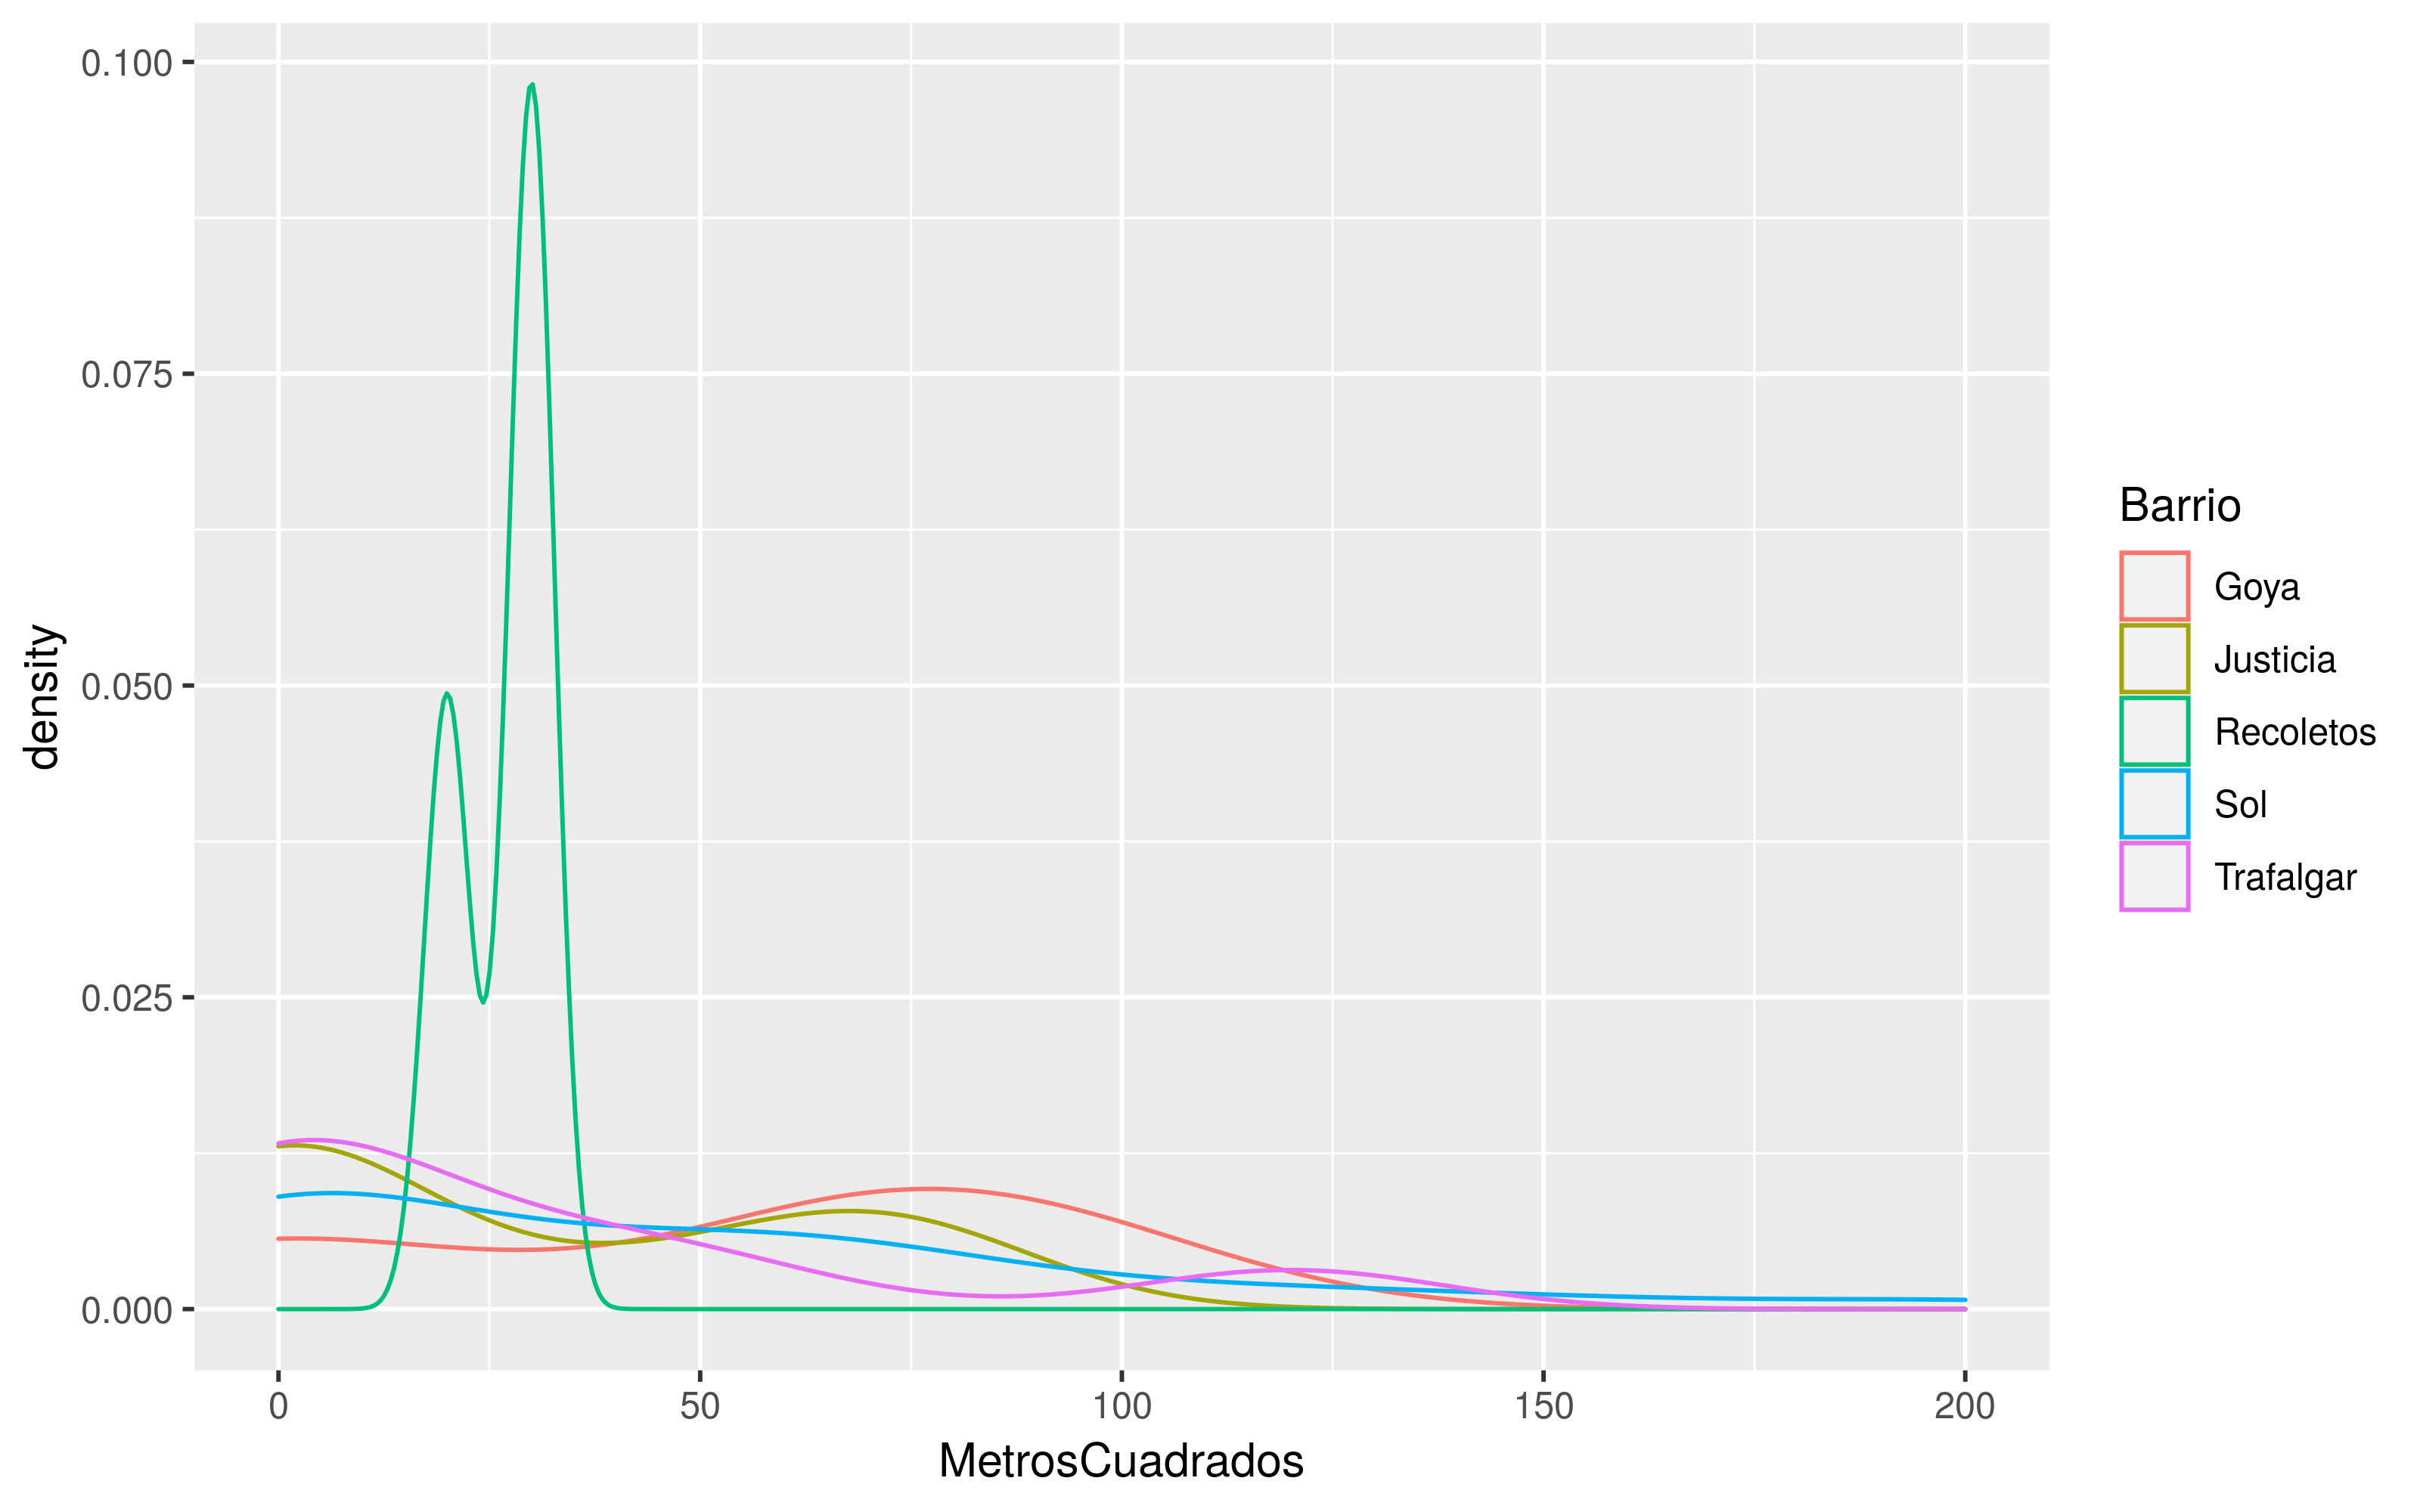

In [123]:
topdimensiones_barrios <- head(media_precio_dim_100, 5) $Barrio
top_barrios <- subset(airbnb_entire, Barrio %in% topprecio_barrios)
ggplot(top_barrios, aes(x=MetrosCuadrados, color=Barrio)) + geom_density()

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [124]:
for (i in unique(top_barrios $Barrio))
{
    subset_barrio <- top_barrios[which(top_barrios $Barrio == as.character(i)),]    
    print(paste("Precio medio del barrio de", i, "=",mean(subset_barrio $MetrosCuadrados, na.rm=T)))

    if (nrow(subset_barrio) > 5000)
    {
        subset_barrio <- subset_barrio[1:5000,]
    }
    
    sp <- shapiro.test(subset_barrio $Precio)
    print(paste("Test shapiro pvalor =", sp $p.value))
}

krt <- kruskal.test(MetrosCuadrados ~ Barrio, top_barrios)
krt
paste("No hay evidencias suficientes que determinen que en cada uno de esos barrios el tamaño de los apartamentos es diferente.",
      "El pvalor del test es muy alto; pvalor=", round(krt $p.value, 2))

[1] "Precio medio del barrio de Sol = 45.6166666666667"
[1] "Test shapiro pvalor = 6.82296081876145e-30"
[1] "Precio medio del barrio de Justicia = 28.5294117647059"
[1] "Test shapiro pvalor = 6.68576869862315e-32"
[1] "Precio medio del barrio de Recoletos = 26.6666666666667"
[1] "Test shapiro pvalor = 2.80034621674868e-13"
[1] "Precio medio del barrio de Goya = 51.6666666666667"
[1] "Test shapiro pvalor = 2.76797989326578e-11"
[1] "Precio medio del barrio de Trafalgar = 29.2857142857143"
[1] "Test shapiro pvalor = 5.98924729847284e-17"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.906, df = 4, p-value = 0.753


[1] "No hay evidencias suficientes que determinen que en cada uno de esos barrios el tamaño de los apartamentos es diferente. El pvalor del test es muy alto, pvalor= 0.75"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [125]:
barrio_sol <- subset(airbnb_entire, Barrio == "Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [126]:
cor(barrio_sol[,c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados")], use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4818932
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5683640
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4284304
MetrosCuadrados,0.4818932,0.5683640,0.4284304,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


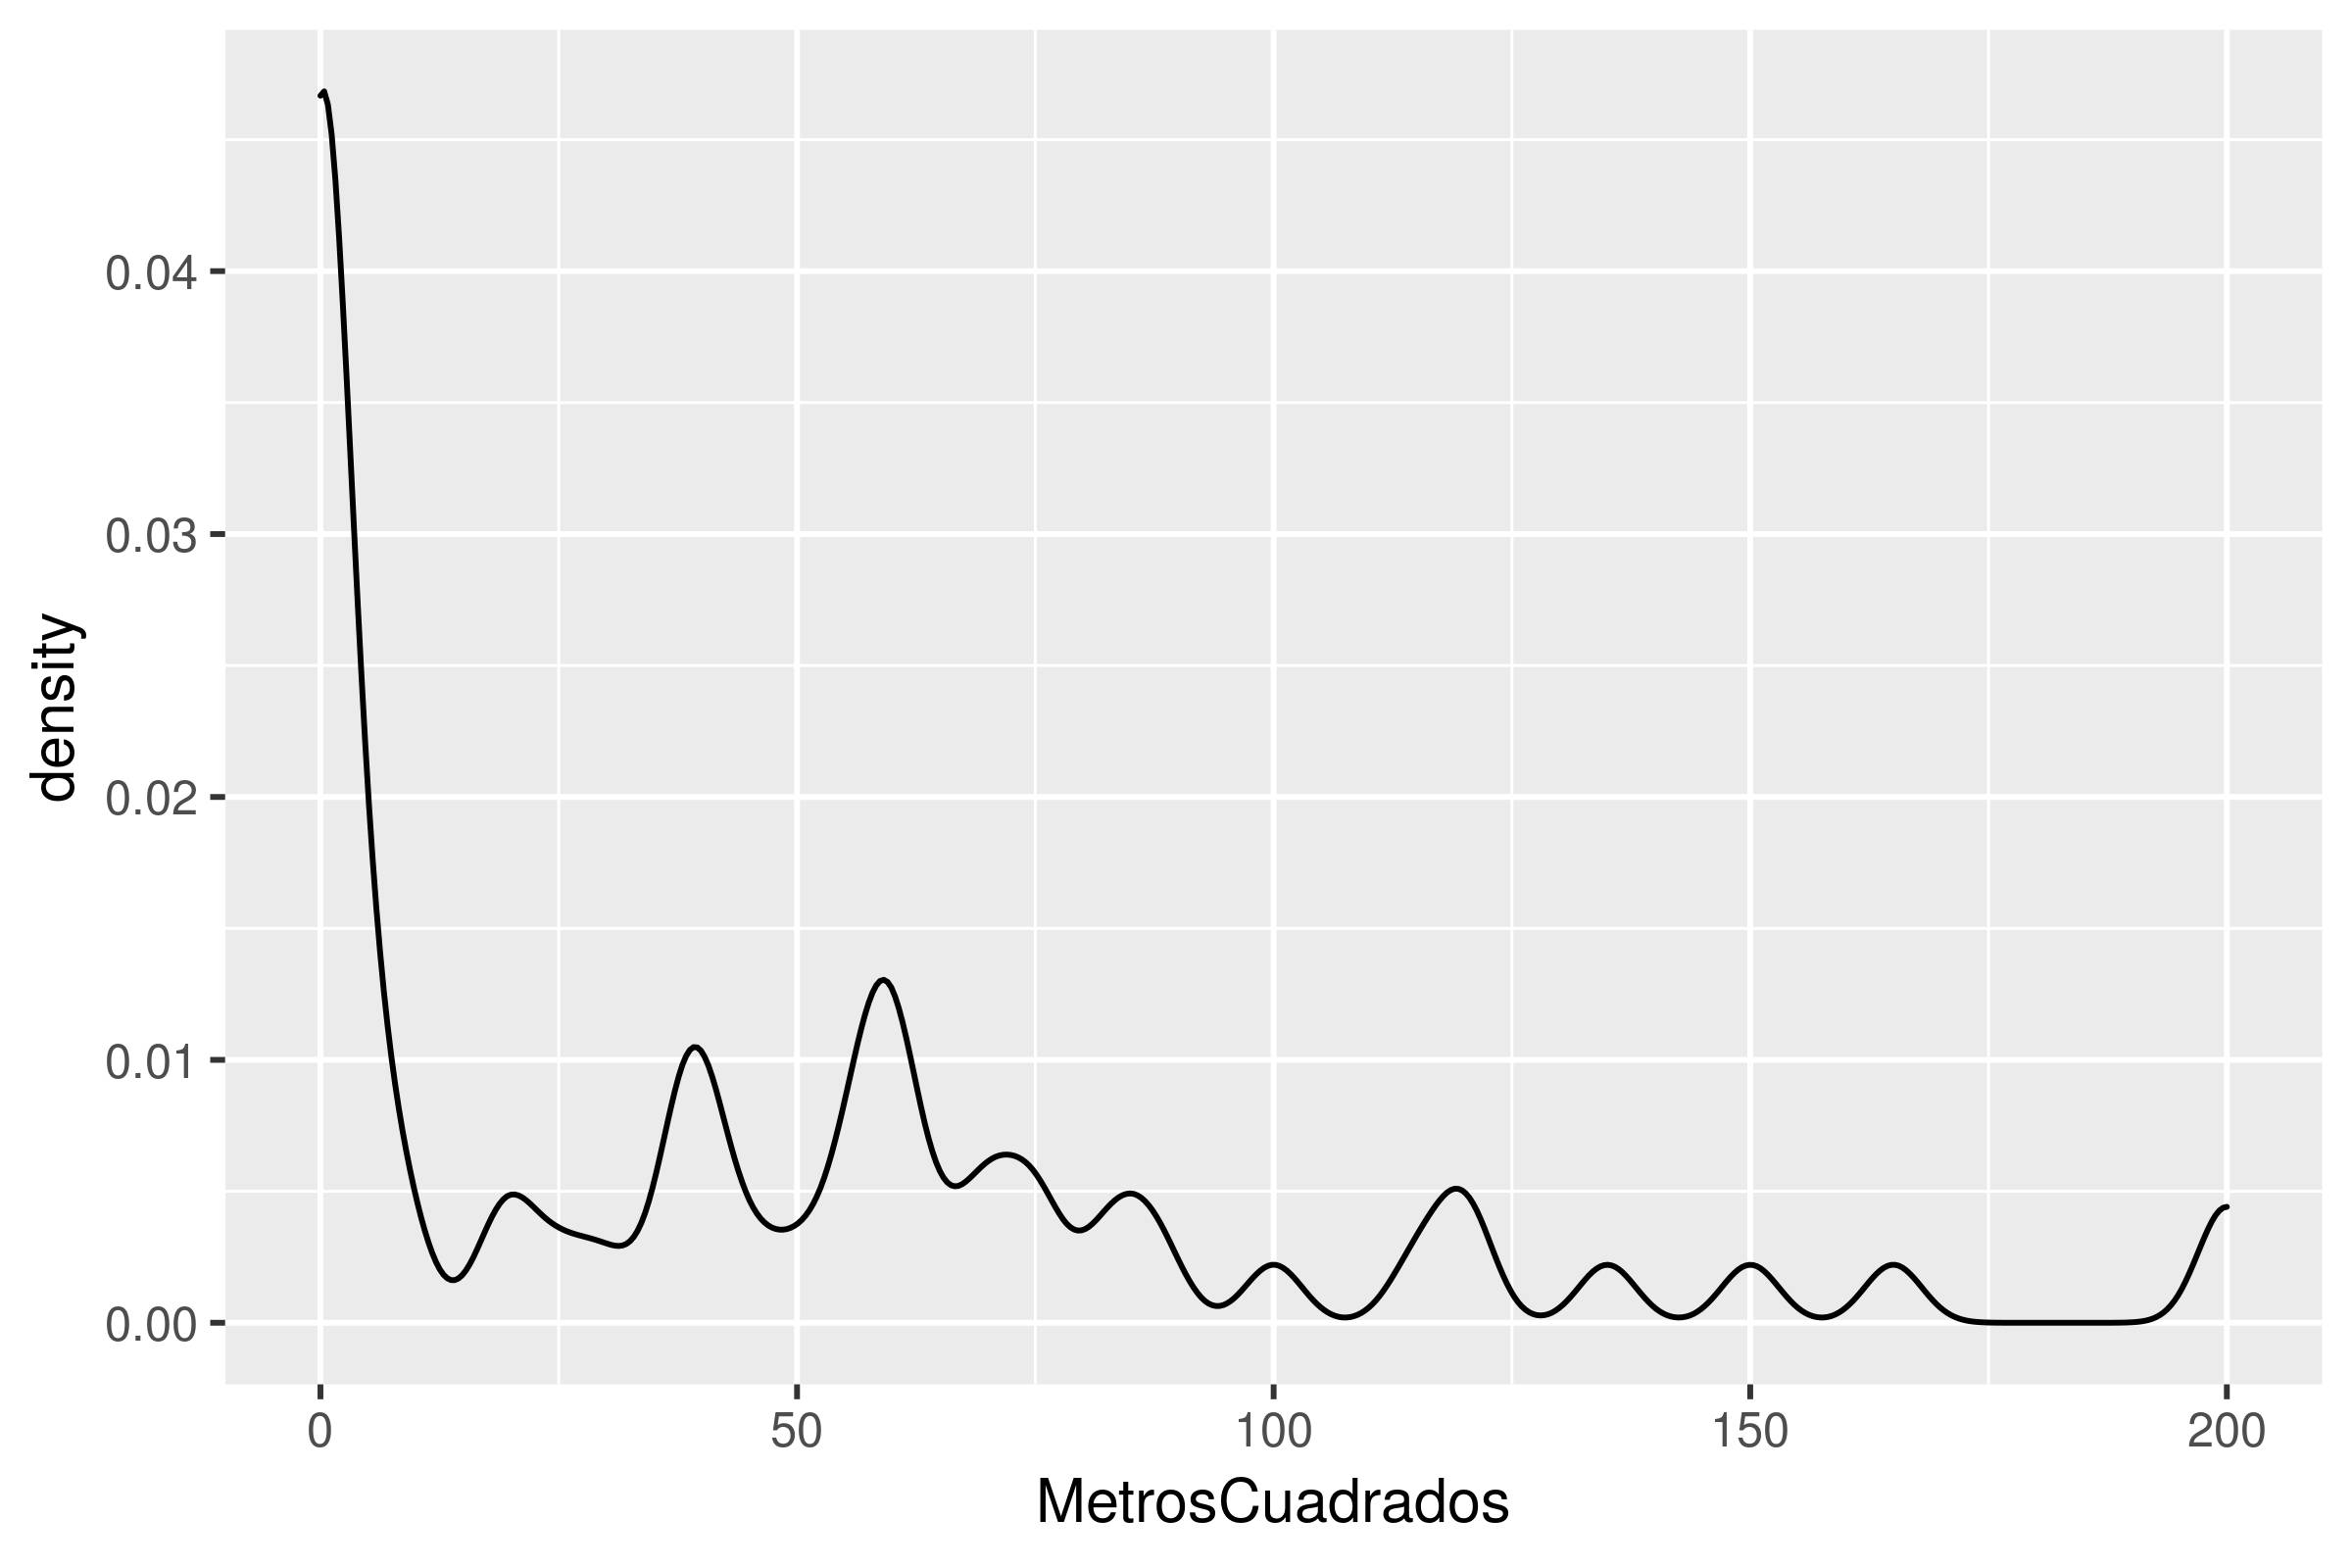

In [127]:
options(repr.plot.height=4, repr.plot.width=6)
ggplot(barrio_sol, aes(x=MetrosCuadrados)) + geom_density(bw=3)

In [128]:
barrio_sol <- subset(barrio_sol, MetrosCuadrados > 10)
table(barrio_sol $NumBanyos)
table(barrio_sol $NumDormitorios)
barrio_sol <- subset(barrio_sol, NumDormitorios > 0)
barrio_sol $fNumDormitorios <- factor(barrio_sol $ NumDormitorios)


 1  2  3  4 
25  7  2  1 


 0  1  2  3  4  5 
 4 17  7  3  2  2 

In [129]:
barrio_sol <- subset(airbnb_entire, Barrio == "Sol" & MetrosCuadrados > 10)
table(barrio_sol $NumDormitorios)
cor(barrio_sol[,c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados")], use="pairwise.complete.obs")


 0  1  2  3  4  5 
 4 17  7  3  2  2 

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7292599,0.8589205,0.6113062
NumDormitorios,0.7292599,1.0000000,0.7855310,0.8215028
MaxOcupantes,0.8589205,0.7855310,1.0000000,0.7121302
MetrosCuadrados,0.6113062,0.8215028,0.7121302,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [130]:
model <- lm(barrio_sol, formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + MaxOcupantes)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.856 -13.684  -5.041  18.519  69.476 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0387    12.9587   2.164  0.03858 * 
NumBanyos         0.5646    14.6043   0.039  0.96942   
NumDormitorios   28.2153     8.5441   3.302  0.00248 **
MetrosCuadrados   0.2236     0.2051   1.090  0.28420   
MaxOcupantes      2.6739     4.4331   0.603  0.55093   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.732e-09


In [131]:
model <- lm(barrio_sol, formula = Precio ~ MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.171 -18.411  -0.143   9.143 122.134 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.9159    12.6761   2.439   0.0203 *  
MetrosCuadrados   0.9797     0.1404   6.978 5.61e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.65 on 33 degrees of freedom
Multiple R-squared:  0.596,	Adjusted R-squared:  0.5838 
F-statistic: 48.69 on 1 and 33 DF,  p-value: 5.607e-08


In [132]:
model <- lm(barrio_sol, formula = Precio ~ NumDormitorios)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


In [133]:
model <- lm(barrio_sol, formula = Precio ~ NumDormitorios + MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.706 -15.066  -4.435  17.341  68.129 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.0939    10.0935   3.378  0.00193 ** 
NumDormitorios   31.8849     7.0762   4.506  8.3e-05 ***
MetrosCuadrados   0.2557     0.1956   1.307  0.20044    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.7 on 32 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7374 
F-statistic: 48.73 on 2 and 32 DF,  p-value: 1.94e-10


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [134]:
# La variable que mejor responde es la de NumDormitorios. 
# Los metros cuadrados y NumDormitorios estan muy correlados.
# Por eso una combinación lineal de ambas no ayuda a mejorar el R^2 significativamente.

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [135]:
model <- lm(barrio_sol, formula = Precio ~ MetrosCuadrados)
confint(model)["MetrosCuadrados",]

2.5 %    97.5 % 
0.6940177 1.2653210

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [136]:
model <- lm(barrio_sol, formula = Precio ~ NumDormitorios)
confint(model)["NumDormitorios",]

2.5 %   97.5 % 
31.18746 47.78095

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [137]:
dormitorios3 <- sum(barrio_sol $NumDormitorios == 3)
numTotal <- nrow(barrio_sol)

paste("La probabilidad es:", dormitorios3/numTotal)

paste("El margen de confianza es: [",binom.test(dormitorios3, numTotal) $conf[1],
      ",", binom.test(dormitorios3, numTotal) $conf[2],"]")

[1] "La probabilidad es: 0.0857142857142857"

[1] "El margen de confianza es: [ 0.0180376398142175 , 0.230575018658877 ]"